<a href="https://colab.research.google.com/github/Samsonboadi/works/blob/master/Fraud%20detection%20usinf%20AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Machine Learning Fraud Detection

Intall all the dependancies for the credit card fraudulent transactions

In [2]:
!pip install pandas==0.19.2 scikit-learn==0.20
#to access kaggle datasets
!pip install kaggle


     |████████████████████████████████| 18.9MB 3.4MB/s 
     |████████████████████████████████| 5.3MB 42.1MB/s 
ERROR: plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.19.2 which is incompatible.
ERROR: mizani 0.5.4 has requirement pandas>=0.23.4, but you'll have pandas 0.19.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.19.2 which is incompatible.
ERROR: featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.19.2 which is incompatible.
ERROR: fbprophet 0.5 has requirement pandas>=0.23.4, but you'll have pandas 0.19.2 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3


Importing the dataset

In [3]:
# Colab's file access feature
from google.colab import files

#retrieve uploaded file
uploaded = files.upload()

#print results
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json




Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [4]:
#download earthquake data, will take 30-60 seconds
!kaggle competitions download -c ieee-fraud-detection

 97% 51.0M/52.5M [00:00<00:00, 67.4MB/s]
100% 52.5M/52.5M [00:00<00:00, 151MB/s] 
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 100MB/s]
 57% 27.0M/47.3M [00:00<00:00, 117MB/s]
100% 47.3M/47.3M [00:00<00:00, 158MB/s]
  0% 0.00/2.97M [00:00<?, ?B/s]
100% 2.97M/2.97M [00:00<00:00, 98.5MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 163MB/s]


In [5]:
#unzip training data for usage, will take about 5 minutes (its big)
!ls
#!unzip train_transaction.csv.zip
!unzip test_transaction.csv.zip
!unzip test_identity.csv.zip
!unzip train_transaction.csv.zip
!unzip train_identity.csv.zip
!ls

sample_data		   test_identity.csv.zip     train_identity.csv.zip
sample_submission.csv.zip  test_transaction.csv.zip  train_transaction.csv.zip
Archive:  test_transaction.csv.zip
  inflating: test_transaction.csv    
Archive:  test_identity.csv.zip
  inflating: test_identity.csv       
Archive:  train_transaction.csv.zip
  inflating: train_transaction.csv   
Archive:  train_identity.csv.zip
  inflating: train_identity.csv      
sample_data		   test_transaction.csv      train_transaction.csv
sample_submission.csv.zip  test_transaction.csv.zip  train_transaction.csv.zip
test_identity.csv	   train_identity.csv
test_identity.csv.zip	   train_identity.csv.zip


Step 3 - Exploratory Data Analysis

In [0]:
import pandas as pd

# Read the CSV file
#df = pd.read_csv('train_transaction.csv')

# Show the contents
#print(df)

train_df_id = pd.read_csv('train_identity.csv')
train_df_tran = pd.read_csv("train_transaction.csv")
test_df_id = pd.read_csv('test_identity.csv')
test_df_tran = pd.read_csv("test_transaction.csv")


SINCE THERE ARE NON VALUES IN THE DATASET AND SCIKIT LEARN IS NOT SO HAPPY ABOUT, WE DROP ALL NAN VALUES OR REPLACE NAN VALUES WITH A DESIRED VALUE.

Merge the train dataset based on the Transaction Id

In [7]:
train_df = pd.merge(train_df_tran, train_df_id, on = "TransactionID", how = "left")
train_df.shape
test_df = pd.merge(test_df_tran, test_df_id, how='left', on = "TransactionID")
print(train_df.shape)
print(test_df.shape)
y_train = train_df['isFraud'].copy()

(590540, 434)
(506691, 433)


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


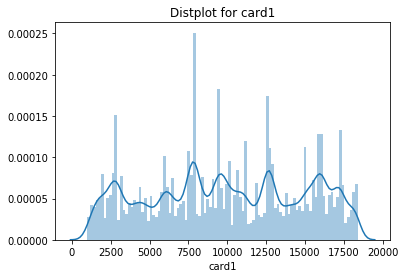

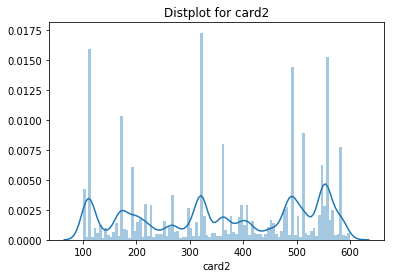

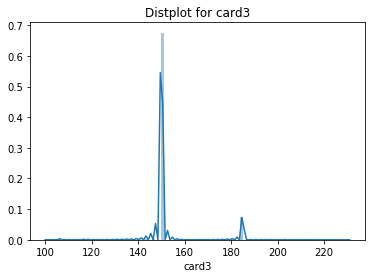

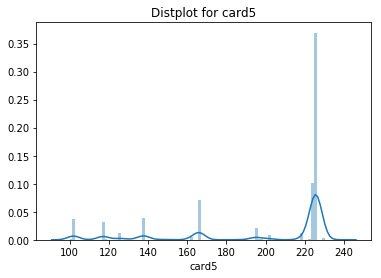

In [8]:
#Exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt
card_col = train_df.filter(like="card")
card_col.head()

cards = ["card1", "card2", "card3", "card5"]

def plot_figure(df, name):
    # generate new plot each time 
    # so we can have multiple viz in a loop
    plot = plt.figure()
    plot = sns.distplot(df[name], bins = 100)
    plt.title("Distplot for {}".format(name))
    return plot
    

for card in cards:
    plot_figure(train_df, card)


In [0]:
# Drop target, fill in NaNs
X_train = train_df.drop('isFraud', axis=1)
X_test = test_df.copy()


In [0]:
from sklearn import preprocessing
# Label Encoding
for f in X_train.columns:
    if X_train[f].dtype=='object' or X_test[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X_train[f].values) + list(X_test[f].values))
        X_train[f] = lbl.transform(list(X_train[f].values))
        X_test[f] = lbl.transform(list(X_test[f].values))  

In [11]:
import numpy as np
np.isnan(X_train)
np.where(np.isnan(X_train))
X_train=np.nan_to_num(X_train)
X_test =np.nan_to_num(X_test) 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
# And finally: show the results
X_test =np.nan_to_num(X_test) 
from sklearn.metrics import classification_report
result = clf.predict(X_test)
result


array([0, 0, 0, ..., 0, 0, 0])